In [6]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:

import sys
import os

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..', 'src')))


In [8]:
import pandas as pd
from data.data_utils import DataLoader

In [9]:
d = DataLoader(r"..\data\post_deployment\raw\batch_train.csv")
batch_set = d.load_data(drop_customer_id=False)
encd_batch_set = d.preprocess_data()
encd_batch_set = encd_batch_set.reset_index()

In [10]:
import numpy as np
import pandas as pd
import os 
from pathlib import Path
import featuretools as ft

from features.generate_and_transform_features import FeatureGenerater,FeatureTransformer
from data.data_utils import DataLoader
from dotenv import load_dotenv

env_path = Path('.env')
load_dotenv(env_path)

root_dir = Path(os.getenv('ROOT_DIRECTORY'))
feature_name_path = root_dir/'reports'/'feature_dfs'/'featured_final_train.json'
train_set = pd.read_csv(root_dir/'data'/'interim'/'train_set.csv')
transformed_featured_final_train_set = pd.read_csv(root_dir/'data'/'processed'/'transformed_featured_final_train_set.csv')

In [11]:
train_set['Churn'].isnull().sum()

0

In [12]:

combined_set = pd.concat([train_set,encd_batch_set])
combined_set = combined_set.drop(columns='index').reset_index(drop=True).reset_index()


In [13]:

with open(feature_name_path,'r') as f:
    feature_defs = ft.load_features(f)

new_es = ft.EntitySet(id="new_entity")

new_es.add_dataframe(
    dataframe=combined_set,
    dataframe_name='final_train',
    index='index'
)

featured_batch = ft.calculate_feature_matrix(
    features=feature_defs,
    entityset=new_es
)

featured_batch = featured_batch.reset_index()

c:\Users\DELL\Desktop\project\Customer Churn Related Things\customer_churn_prediction\myenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\DELL\Desktop\project\Customer Churn Related Things\customer_churn_prediction\myenv\Lib\site-packages\woodwork\type_sys\utils.py:33: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  pd.to_datetime(
c:\Users\DELL\Desktop\project\Customer Churn Related Things\customer_churn_prediction\myenv\Lib\site-packages\featuretools\primitives\standard\transform\absolute_diff.py:68: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  retur

In [14]:
final_featured_batch = featured_batch.reset_index(drop=True).loc[train_set.shape[0]+encd_batch_set['index'],:]

In [15]:

cleaned_featured_batch = FeatureGenerater(combined_set,final_featured_batch).clean_dataframes(final_featured_batch)

In [16]:

customerid = cleaned_featured_batch['customerID']

In [17]:

transformed_batch = FeatureTransformer(cleaned_featured_batch.drop(columns='customerID')).transform()

In [18]:

_,transformed_aligned_batch = transformed_featured_final_train_set.align(transformed_batch,join='inner',axis=1)

[autoreload of data.data_utils failed: Traceback (most recent call last):
  File "c:\Users\DELL\Desktop\project\Customer Churn Related Things\customer_churn_prediction\myenv\Lib\site-packages\IPython\extensions\autoreload.py", line 276, in check
    superreload(m, reload, self.old_objects)
  File "c:\Users\DELL\Desktop\project\Customer Churn Related Things\customer_churn_prediction\myenv\Lib\site-packages\IPython\extensions\autoreload.py", line 475, in superreload
    module = reload(module)
             ^^^^^^^^^^^^^^
  File "C:\Users\DELL\AppData\Local\Programs\Python\Python311\Lib\importlib\__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen importlib._bootstrap>", line 621, in _exec
  File "<frozen importlib._bootstrap_external>", line 936, in exec_module
  File "<frozen importlib._bootstrap_external>", line 1074, in get_code
  File "<frozen importlib._bootstrap_external>", line 1004, in source_to_code
  File "<frozen importlib._bootstrap>", line 24

In [19]:
transformed_aligned_batch['customerID'] = customerid.reset_index(drop=True)

In [20]:
transformed_aligned_batch.to_csv(root_dir/'data'/'post_deployment'/'processed'/'transformed_aligned_batch.csv')

### Series Introduction:

Welcome to the **Kaggle Customer Churn Master Series**, where we guide you from the fundamentals to advanced strategies in customer churn prediction. In the [**first notebook**](https://www.kaggle.com/code/deepsutariya/explore-churn-insights-plotly-eda-for-beginners), we laid the groundwork with a thorough Exploratory Data Analysis (EDA), uncovering hidden patterns and preparing our dataset for the rigorous tasks ahead. Now, in the **second notebook** of this series, we're set to transcend the basics, diving into the complexities of ***automated feature engineering using featuretools, model optimization using optuna***, and tailored techniques that push the boundaries of churn prediction.each step is crafted to extract the maximum performance from state-of-the-art models like ***LightGBM, XGBoost, CatBoost , and ANN***.


### Comprehensive Briefing:
In this notebook, I dive deep into the complexities of customer churn prediction by moving beyond traditional approaches. Instead of relying solely on common metrics and methods, I experimented with advanced techniques that often go overlooked. **As we all know , Feature Engineering is The most important part of the ML life cycle**. My approach leveraged automated feature engineering using the Featuretools library, allowing me to extract meaningful insights without needing telecom-specific expertise.

I meticulously optimized multiple state-of-the-art models, including LightGBM, XGBoost, and ANN, using Optuna for hyperparameter tuning. While many focus on ensembling, I found success in fine-tuning individual models and ultimately selecting the best performer, rather than defaulting to a weighted ensemble.

In a unique twist, I incorporated linear regression to explore hyperparameter relationships, aiming to predict combinations that could deliver exceptional performance. Although not all strategies were successful—like SMOTEd datasets and ROC AUC as a primary metric—I identified and honed in on the techniques that truly made a difference. This notebook is a comprehensive exploration of what works and what doesn’t, offering valuable lessons for anyone looking to push the boundaries of churn prediction modeling.

# Detailed Summary and Rationale


### Data Loading and Preprocessing


**DataLoader Class:**
- **Purpose:** Efficiently handle data loading and preprocessing tasks.
- **Details:** The `DataLoader` class initializes with the file path of the dataset, loads the data, preprocesses columns, and converts categorical variables to dummy variables.
- **Rationale:** Automating these tasks ensures consistency and reduces the risk of errors. This modular approach makes the code more maintainable and reusable.

### Train-Test-Validation Split

**Stratified Sampling:**
- **Purpose:** Maintain the class distribution of the target variable across training, testing, and validation sets.
- **Details:** The data is split using stratified sampling to ensure that each set has a balanced representation of both churn and non-churn classes.
- **Rationale:** This approach helps in maintaining the performance metrics' validity and ensures that the model generalizes well across different datasets.

### Handling Class Imbalance

**SMOTE (Synthetic Minority Over-sampling Technique):**
- **Purpose:** Address the issue of class imbalance in the dataset.
- **Details:** SMOTE generates synthetic samples for the minority class to balance the class distribution.
- **Rationale:** Balanced class distribution helps in improving the model's ability to correctly identify both churn and non-churn customers, thereby enhancing the recall and precision of the model.

### Feature Engineering

**Automated Feature Engineering with Featuretools:**
- **Purpose:** Generate new features automatically from the existing dataset.
- **Details:** The Featuretools library is used to create meaningful features by capturing relationships and interactions between different variables.
- **Rationale:** Feature engineering is critical for improving model performance. Automatically generating features can uncover hidden patterns and interactions that might not be immediately obvious.


### Performance Metrics

**Weighted Recall:**
- **Purpose:** Evaluate the model's ability to correctly identify the positive class (churn) while considering the class distribution.
- **Details:** Weighted recall gives more importance to the minority class, ensuring that the model does not ignore it in favor of the majority class.
- **Rationale:** In churn prediction, correctly identifying churners (the positive class) is crucial for taking preventive actions. Weighted recall helps in optimizing the model for this purpose.

### Optimization

**Optuna for Hyperparameter and Model Selection Optimization:**
- **Purpose:** Find the optimal hyperparameters and model selection to improve performance.
- **Details:** Optuna is used to conduct hyperparameter tuning, maximizing metrics such as ROC AUC, F1 score, and recall score. Additionally, Optuna optimizes the weights for the ensemble model.
- **Rationale:** Hyperparameter optimization and model selection are essential for enhancing model performance and ensuring that the model is well-suited to the data.

### Ensemble Methods

**Optimized Weights for Soft Voting Ensemble:**
- **Purpose:** Combine the predictions of multiple models to improve overall performance.
- **Details:** Optuna is used to optimize the weights for combining predictions from LightGBM, CatBoost, XGBoost, and a neural network.
- **Rationale:** Ensemble methods leverage the strengths of different models, providing a more robust and accurate prediction by reducing individual model biases and variances.


Let's see whether the featured smoted datasets are performing well or not.
The AUC score is suggesting that smoted datasets are overfitting thus i am not going to use it any more , now we left with the featured dataset and original dataset

**If you find this notebook helpful and inspiring, don’t forget to give it a thumbs up! 👍**

# 🚨 **The Critical Role of Feature Engineering in Machine Learning** 🚨

In the rapidly evolving world of machine learning, one truth remains constant: **the quality of your features determines the quality of your model**. Feature engineering is not just another step in the pipeline; it is the foundation upon which your model's performance is built. Without robust, well-crafted features, even the most sophisticated algorithms can falter. 

Imagine you're an architect. You could have the most advanced tools and technology at your disposal, but if the building materials you use are subpar, the final structure will inevitably be weak. The same principle applies in machine learning—**feature engineering is the process of transforming raw data into the critical building blocks that empower your model to achieve excellence and ```without exaggeration it is the most important part in the ML lifecycle```**.

## 🛠️ **FeatureTools: The Architect of Your Model’s Success** 🛠️

Enter **FeatureTools**—a powerful library that automates the process of creating meaningful features from your raw data. But make no mistake—this is not just automation for convenience's sake. FeatureTools is your blueprint for success, providing a systematic way to craft features that will enable your model to not only learn but to excel in predicting outcomes with precision.Let's learn this serious topic with fun.

### **Why Feature Engineering Matters**

- **Entities**: These are the ingredients—your raw datasets—like vegetables and spices. In this case, our training and test sets are the ingredients, and just like how each veggie might need to be chopped differently, each dataset needs its own unique index to keep things in order. i.e individual dataframe is named as an entity.

- **EntitySet**: Think of this as your kitchen. It’s where you store all your ingredients (dataframes). Each dataset, like your training and test sets, gets its own special spot in this kitchen, labeled with unique names so they never get mixed up. i.e Set of dataframe(s) and their relations is called entityset.
  


- **Primitive Transformations**: Ever seen a chef quickly dice an onion into perfect little cubes? That’s what these transformations do to your data. They take your basic ingredients and slice them, dice them, and mix them in ways that create new, richer flavors—er, I mean features!. i.e Generating new features from individual features is called ``transformation``.

- **Aggregation**: Picture a large pot where all the diced onions, tomatoes, and spices simmer together. Aggregation takes your data and combines it to extract meaningful patterns. It’s like boiling down all those ingredients into a rich, flavorful stock—perfect for adding depth to your model. i.e Generating features from combination of multiple features is called ``Aggregation``.



## **Building a Model with Purpose**

When you use FeatureTools, you're not just building a model—you’re constructing a solution with real-world impact. This isn’t just theory; **this is the practice of creating features that will enable your model to perform reliably in the most demanding production environments**.

In our `Feature_Engineering` class, we’re taking this theory into practice. From setting up your EntitySet to generating and refining features, every step is a deliberate action to enhance your model’s performance. This is feature engineering with a purpose.

1. **Create_Entityset**: First, we set up our kitchen with the `Create_Entityset` method. We organize our ingredients (datasets) neatly, making sure everything has its place. If our ingredients don’t come pre-labeled (indexed), our magical helpers create labels for us, ensuring nothing gets lost in the mix. i.e this method creates ``Entityset`` from multiple dataframe(s) and their relations.

2. **add_dataframe**: Using this method we can add dataframe into the entity set.For that  we should provide dataframe_name,datframe,index(if your dataframe hasn't index you have to set make_index=True).

2. **Generate_Features**: Next, we call on FeatureTools to start the real magic—transforming our raw ingredients into delicious features. It’s like watching a chef in action, taking raw veggies and turning them into a gourmet meal. Whether it's chopping (transformations) or slow-cooking (aggregations), our features get enhanced, refined, and prepped for the main event: feeding the model!. i.e this method generates features from raw data and combine it with target dataframe.

3. **Cleaning and Alignment**: But even in the best kitchens, you need to tidy up. So, we clean the names, remove any duplicates, and ensure that everything is aligned perfectly between the training and test sets—no mismatched spices here!. i.e After feature engineering we will get **mutlilevel indexed** target dataframe. we have to convert it into normal dataframe. 

## **Important Terminologies**

### Transformation Primitives
- **Transformation Primitives** are like little recipes that take one column and create new features by applying mathematical or logical operations. For example, if you have a column with dates, a transformation primitive could create a new column with the day of the week (Monday, Tuesday, etc.).

### Aggregation Primitives
- **Aggregation Primitives** are used when you have data grouped in some way, like sales data for different stores. These primitives combine the data in each group to create a single summary value, like the average sales per store or the total sales for each month.

### Ignore Columns
- **Ignore Columns** are columns that you tell the program not to use when creating new features. Maybe these columns contain information that would give away the answer too easily (like a column that directly says whether a customer has left), or maybe they just aren't useful for your model.


# 🚨 **The Critical Role of Feature Engineering in Machine Learning** 🚨

In the rapidly evolving world of machine learning, one truth remains constant: **the quality of your features determines the quality of your model**. Feature engineering is not just another step in the pipeline; it is the foundation upon which your model's performance is built. Without robust, well-crafted features, even the most sophisticated algorithms can falter. 

Imagine you're an architect. You could have the most advanced tools and technology at your disposal, but if the building materials you use are subpar, the final structure will inevitably be weak. The same principle applies in machine learning—**feature engineering is the process of transforming raw data into the critical building blocks that empower your model to achieve excellence and ```without exaggeration it is the most important part in the ML lifecycle```**.

## 🛠️ **FeatureTools: The Architect of Your Model’s Success** 🛠️

Enter **FeatureTools**—a powerful library that automates the process of creating meaningful features from your raw data. But make no mistake—this is not just automation for convenience's sake. FeatureTools is your blueprint for success, providing a systematic way to craft features that will enable your model to not only learn but to excel in predicting outcomes with precision.Let's learn this serious topic with fun.

### **Why Feature Engineering Matters**

- **Entities**: These are the ingredients—your raw datasets—like vegetables and spices. In this case, our training and test sets are the ingredients, and just like how each veggie might need to be chopped differently, each dataset needs its own unique index to keep things in order. i.e individual dataframe is named as an entity.

- **EntitySet**: Think of this as your kitchen. It’s where you store all your ingredients (dataframes). Each dataset, like your training and test sets, gets its own special spot in this kitchen, labeled with unique names so they never get mixed up. i.e Set of dataframe(s) and their relations is called entityset.
  


- **Primitive Transformations**: Ever seen a chef quickly dice an onion into perfect little cubes? That’s what these transformations do to your data. They take your basic ingredients and slice them, dice them, and mix them in ways that create new, richer flavors—er, I mean features!. i.e Generating new features from individual features is called ``transformation``.

- **Aggregation**: Picture a large pot where all the diced onions, tomatoes, and spices simmer together. Aggregation takes your data and combines it to extract meaningful patterns. It’s like boiling down all those ingredients into a rich, flavorful stock—perfect for adding depth to your model. i.e Generating features from combination of multiple features is called ``Aggregation``.



## **Building a Model with Purpose**

When you use FeatureTools, you're not just building a model—you’re constructing a solution with real-world impact. This isn’t just theory; **this is the practice of creating features that will enable your model to perform reliably in the most demanding production environments**.

In our `Feature_Engineering` class, we’re taking this theory into practice. From setting up your EntitySet to generating and refining features, every step is a deliberate action to enhance your model’s performance. This is feature engineering with a purpose.

1. **Create_Entityset**: First, we set up our kitchen with the `Create_Entityset` method. We organize our ingredients (datasets) neatly, making sure everything has its place. If our ingredients don’t come pre-labeled (indexed), our magical helpers create labels for us, ensuring nothing gets lost in the mix. i.e this method creates ``Entityset`` from multiple dataframe(s) and their relations.

2. **add_dataframe**: Using this method we can add dataframe into the entity set.For that  we should provide dataframe_name,datframe,index(if your dataframe hasn't index you have to set make_index=True).

2. **Generate_Features**: Next, we call on FeatureTools to start the real magic—transforming our raw ingredients into delicious features. It’s like watching a chef in action, taking raw veggies and turning them into a gourmet meal. Whether it's chopping (transformations) or slow-cooking (aggregations), our features get enhanced, refined, and prepped for the main event: feeding the model!. i.e this method generates features from raw data and combine it with target dataframe.

3. **Cleaning and Alignment**: But even in the best kitchens, you need to tidy up. So, we clean the names, remove any duplicates, and ensure that everything is aligned perfectly between the training and test sets—no mismatched spices here!. i.e After feature engineering we will get **mutlilevel indexed** target dataframe. we have to convert it into normal dataframe. 

## **Important Terminologies**

### Transformation Primitives
- **Transformation Primitives** are like little recipes that take one column and create new features by applying mathematical or logical operations. For example, if you have a column with dates, a transformation primitive could create a new column with the day of the week (Monday, Tuesday, etc.).

### Aggregation Primitives
- **Aggregation Primitives** are used when you have data grouped in some way, like sales data for different stores. These primitives combine the data in each group to create a single summary value, like the average sales per store or the total sales for each month.

### Ignore Columns
- **Ignore Columns** are columns that you tell the program not to use when creating new features. Maybe these columns contain information that would give away the answer too easily (like a column that directly says whether a customer has left), or maybe they just aren't useful for your model.


## Emphasizing the Importance of Optimization and Optuna in Machine Learning

In the ever-evolving field of Machine Learning (ML), achieving the best possible performance from models is not just a luxury—it's a necessity. Optimization is the key process that allows us to fine-tune models, ensuring that they perform at their peak across various metrics. Optuna, a powerful hyperparameter optimization framework, plays a crucial role in this endeavor. By systematically searching the parameter space, Optuna helps us find the most effective model configurations, often uncovering improvements that might be missed through manual tuning.

The pursuit of optimization should be taken very seriously by anyone involved in ML. It’s not merely about squeezing out the last bit of performance; it’s about understanding the intricacies of model behavior and the profound impact that well-tuned models can have on real-world applications. As you dive deeper into this code, let this mindset guide you: optimization is not a mere step but a cornerstone of advanced ML practice. Stay curious and serious about mastering this skill, as it will set you apart in the world of data science.

## Key Terms and Their Significance

- **Weighted Recall**: This is a custom metric defined as `0.65 * recall + 0.35 * f1`. The idea behind weighted recall is to combine the recall (sensitivity) and F1 score into a single metric, giving more weight to recall. This is particularly important in cases where false negatives (e.g., not detecting churn when it actually occurs) are more costly than false positives.

- **Optuna**: Optuna is an open-source hyperparameter optimization framework that automates the search for optimal hyperparameters. In this code, Optuna is used to optimize various parameters of different models, such as learning rate, depth, and regularization parameters. Its efficiency comes from advanced sampling techniques like TPE (Tree-structured Parzen Estimator) and pruning algorithms like Hyperband, which help in finding the best model configurations faster.

- **TPE Sampler**: This is a sampling algorithm used by Optuna that models the objective function using a Gaussian Mixture Model. It allows for efficient sampling of hyperparameters by focusing on promising regions of the parameter space, thus speeding up the optimization process.

- **Hyperband Pruner**: This is a pruning algorithm that terminates unpromising trials early, allowing the optimizer to allocate more resources to promising candidates. It's particularly useful when the training process is computationally expensive.


- **Logloss**: Logloss is used as an objective function for binary classification models. It measures the uncertainty of predictions, penalizing both wrong predictions and those that are overly confident. Minimizing logloss helps in building models that are well-calibrated.

- **Early Stopping**: This is a technique where training is stopped when the model's performance on a validation set ceases to improve after a certain number of rounds. It prevents overfitting by not allowing the model to train for too long.


Each of these components is critical to the model optimization process. By understanding and utilizing these terms effectively, you can drive your ML models to achieve superior performance, making them more reliable and impactful in practical applications.


If you have any doubts regarding optimzation and feature engineering [visit Q&A](#qa-section) and if not let's see the results of the studies.

## Ensembling  and optimization

Time for a group project! Hopefully, 
this ensemble model doesn’t have that one lazy model that doesn’t pull its weight. Looking at you, CatBoost...


# 🌟 **Unleashing the Power of Optimization: The Art of Model Tuning** 🌟

Welcome to the exciting world of model optimization! Today, we're diving into a sophisticated process where we harness the full potential of multiple models and fine-tune their performance to achieve the best results. 

1. **Sampling Hyperparameters**: We sample indices from the study dataframes for different models (LightGBM, XGBoost, CatBoost, and Neural Network). Each index corresponds to a unique set of hyperparameters. By doing this, we explore various configurations and their impact on model performance.

2. **Fetching and Cleaning Parameters**: Once we have the indices, we retrieve the corresponding hyperparameters for each model. We then clean these parameters to ensure they are ready for training. This process is akin to preparing your ingredients before cooking—making sure they are in their best form.

3. **Setting Fixed Parameters**: Besides the sampled hyperparameters, we set some fixed parameters to control aspects like verbosity or early stopping. These are like the constants in our recipe that don’t change but are crucial for consistency.

### 🤝 **Combining Model Predictions: The Magic of Weighted Voting** 🤝

After training our models with the selected hyperparameters, we combine their predictions using weighted voting. This is where the real magic happens:

- **Training Models**: Each model (LightGBM, XGBoost, CatBoost, and Neural Network) is trained on the training data and then used to make predictions on the validation data.
  
- **Weighting Predictions**: We assign weights to each model’s predictions based on their performance. Think of this as adjusting the volume of each instrument in our orchestra to get the perfect balance.

- **Combining Predictions**: Using these weights, we combine the predictions from all models. This combined prediction is like a beautifully orchestrated piece of music, where each model's output contributes to the final performance.

- **Evaluating Performance**: We calculate various performance metrics such as ROC AUC, F1 score, recall, and accuracy to evaluate the effectiveness of our combined predictions. This helps us understand how well our ensemble performs and guides us in refining our approach.

### 🔧 **Why This Matters** 🔧

This optimization process ensures that we are not just relying on a single model but leveraging the strengths of multiple models. By tuning hyperparameters and combining predictions smartly, we maximize our model’s performance and enhance its ability to make accurate predictions.

So, buckle up and get ready to see how this intricate dance of model optimization and prediction combination works its magic in achieving top-notch performance!


Now, let's get ready to build a neural network model that will make your neurons fire with excitement! Or, at the very least, your CPU fan spin a little faster

If you want to run the optimzation on ensemble than you should change the variable **run_ensemble_trials** to ***True***

 Well, that was like organizing a party where everyone brought the same dish—looks like we might be better off just sticking with one good chef!.
 Result is good compare to unoptimized model but it is not good compare to optimized ones.

After much deliberation, and possibly a few cups of coffee, we’ve decided to stick with the one model that didn’t disappoint us—ANN. Sometimes, it’s better to have one friend you can rely on than a group of unreliable ones!

"Well, look at that! Our ANN model is performing like a champ! Who knew a bunch of neurons could be this reliable? Let’s give it a round of applause (and maybe save it before it gets too proud of itself).

And there you have it! We’ve churned through the data, boosted our spirits, and even made some neural connections along the way. Thanks for sticking around—your presence was more than 0.4 (binary threshold humor, anyone?)! Until next time, keep predicting and stay curious!

And there you have it! We’ve churned through the data, boosted our spirits, and even made some neural connections along the way. Thanks for sticking around—your presence was more than 0.4 (binary threshold humor, anyone?)! Until next time, keep predicting and stay curious!

<a id="qa-section"></a>
## Q&A: for this Notebook

**1. Why did I choose XGBoost, LightGBM, ANN, and CatBoost?**
- **Answer:** These models are known for their robustness and ability to deliver high performance with relatively quick training times. They are widely used for classification tasks and handle various types of data and feature complexities effectively.

**2. Why did I write many classes and functions?**
- **Answer:** To ensure reproducibility and maintain a well-organized workflow. By encapsulating code in functions and classes, the project becomes more modular, easier to debug, and scalable for future enhancements.

**3. Why did I use the Featuretools library for feature engineering?**
- **Answer:** Feature engineering is a crucial aspect of model performance. Since I lacked domain-specific knowledge in the telecom industry, an automated feature engineering approach like Featuretools was ideal. It enabled me to generate valuable features without requiring deep domain expertise, and I was impressed with the quality of the features it produced.

**4. Why did I choose weighted recall as the evaluation criterion?**
- **Answer:** In churn prediction, accurately identifying customers who are likely to churn (the positive class) is essential for taking preventive actions. Weighted recall emphasizes the importance of correctly identifying these customers, helping to optimize the model's performance for this specific task.

**5. Why did I opt for sampling instead of assigning higher weights to the minority class?**
- **Answer:** I wanted to experiment with how the models would perform without relying on class weights. In a different [notebook](https://www.kaggle.com/code/deepsutariya/churn-modeling-to-deployment-mlflow-DagsHub), I explored the impact of increased class weights, but here, I focused on understanding the models' behavior with sampling techniques.

**6. Why did I choose to optimize the original dataset, SMOTEd datasets, and featured datasets?**
- **Answer:** I was experimenting with different data configurations to assess how each impacted model performance. This approach allowed me to compare the effectiveness of original, SMOTEd, and feature-engineered datasets in driving model accuracy and generalization.

**7. Why did I select ANN as the final model?**
- **Answer:** After training various models, I initially attempted to ensemble them and optimize the ensemble. However, the ensemble approach didn't yield the desired results. I then selected the top 5 individual models and tried an equal-weight ensemble, but this also underperformed. Ultimately, I chose the best-performing individual model, which was the ANN, as the final model for the project.


**8. Why did I use Optuna for hyperparameter optimization?**
- **Answer:** Optuna is a powerful tool for hyperparameter tuning, Best part of the oputna is ***Parallal Training***. It helped me find the best-performing model configurations, ultimately improving the accuracy and reliability of the predictions.

**9. What role did linear regression play in the final model selection?**
- **Answer:** I used linear regression to capture the relationships between hyperparameters and model performance. This allowed me to predict additional hyperparameter combinations that might perform exceptionally well, further fine-tuning the final model.Unfortunatly , it didn't work. So i removed this part, If you want to experiment with that you can  visit old version (33) of this notebook.

**10. Why did I use an ensemble of models instead of relying on a single model?**
- **Answer:** Ensembling helps to combine the strengths of different models, potentially leading to more robust and accurate predictions. Although the ensemble didn't outperform the best individual model in this case, it was important to explore this option to ensure that no potential performance gains were overlooked.

**11. How did I handle the class imbalance in the dataset?**
- **Answer:** I experimented with both SMOTE and sampling techniques to balance the class distribution. This was crucial for ensuring that the model was not biased towards the majority class, thus improving its ability to correctly predict churners.

**12.Where is the EDA section?**
- **Answer:** It is in the first notebook of this series.

## Conclusion

Congratulations! You've just unlocked two incredibly powerful tools in the world of data science—**Featuretools** and **Optuna**. By mastering these, you've gained skills that aren't just theoretical but directly applicable to real-world problems and production environments. Imagine the countless hours saved by automating feature engineering with Featuretools, and the sheer precision added to your models through Optuna's hyperparameter optimization. These are skills that will serve you not just today, but for the rest of your career.

The knowledge you've acquired here is more than just another bullet point on your resume—it's a lifelong asset. Whether you're optimizing models for a small startup or deploying complex systems at scale, Featuretools and Optuna will be your go-to tools, helping you solve problems more efficiently and effectively.

## What's Next?

But the journey doesn't end here. Imagine running hundreds of optimization studies in parallel, each one fine-tuning models to perfection. Now, think about the chaos of managing each of these experiments manually. Impossible, right?

This is where **MLflow** comes into play, and that's exactly what we'll dive into in the next [notebook](https://www.kaggle.com/code/deepsutariya/churn-modeling-to-deployment-mlflow-DagsHub). MLflow is the key to scaling your optimization efforts, allowing you to track, manage, and deploy your models with ease. It's like having a superpower in the world of machine learning—a way to bring order to the chaos of experimentation.

So, get ready to elevate your skills even further. The next notebook is not just a continuation—it's a leap into the future of machine learning at scale. Don't miss out on discovering how MLflow can make your life easier and your work more impactful. See you there!


## What Didn't Work

- **Ensemble Methods:**
  - While ensembling is often used to improve model performance, in this case, the ensemble approach did not yield better results compared to individual models. The ensembles failed to outperform the best single model, suggesting that the combined predictions may have introduced additional noise or reduced the effectiveness of the model.

- **SMOTEd Data:**
  - Applying SMOTE (Synthetic Minority Over-sampling Technique) to balance the dataset didn't enhance the model performance as expected. The generated synthetic samples may have introduced patterns that were too similar to existing data, leading to overfitting or not providing the desired generalization.

- **ROC AUC as a Metric:**
  - The ROC AUC metric, while useful in many scenarios, was not as effective in this particular context. It may not have captured the critical aspects of model performance, especially when the focus was on correctly identifying churners (weighted recall being a better alternative).

- **Linear Regression Fitting:**
  - Fitting linear regression to model the relationships between hyperparameters and performance didn't produce the expected improvements. The assumptions of linear regression might not have aligned well with the complexity of the hyperparameter interactions, leading to suboptimal predictions.

## What Worked

- **Automated Feature Engineering:**
  - The use of automated feature engineering, particularly through the Featuretools library, significantly enhanced the model’s performance. It allowed for the generation of meaningful features without needing deep domain expertise, providing a strong foundation for the models.

- **Optimization of LightGBM:**
  - Hyperparameter optimization of the LightGBM model using tools like Optuna resulted in substantial performance improvements. The optimized LightGBM model outperformed others, making it a key component of the final solution.

#### **Flow diagram of the notebook**

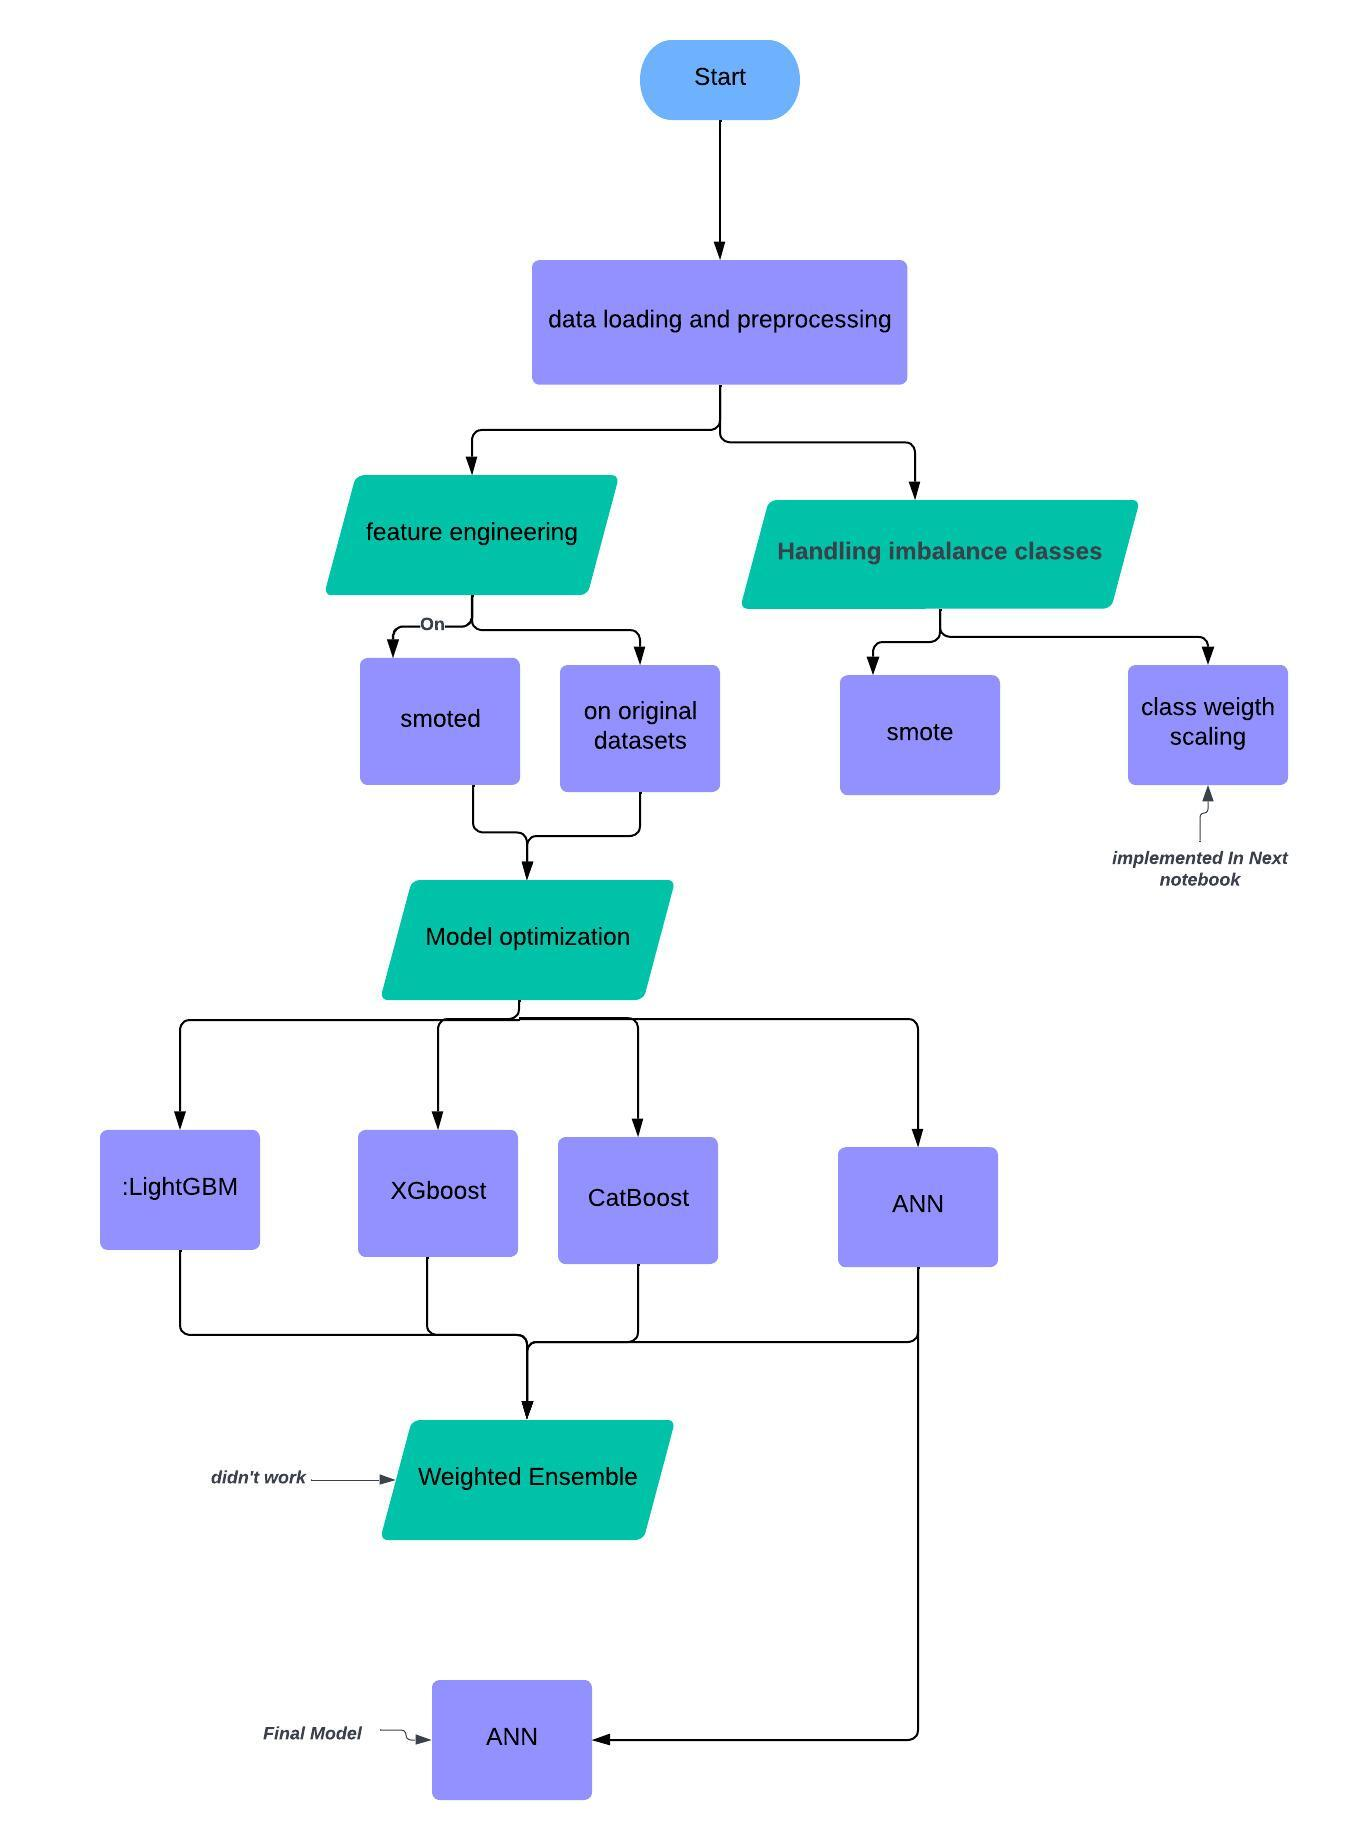

In [21]:
from IPython.display import Image, display

# Path to the image in your local environment
image_path = "../reports/figures/Copy of Algorithm flowchart example(1).jpeg"

# Display the image
display(Image(filename=image_path))

### Series Introduction:

Welcome to the **Kaggle Customer Churn Master Series**, where we've journeyed through the essentials and beyond in predicting customer churn.If you are unaware about this series please take a look into first two notebooks . Throughout this series, we've explored data analysis, feature engineering, and model optimization to equip you with the tools and knowledge to tackle churn prediction with confidence. 

### Notebook Introduction:

In **Notebook 3**, the final installment of this series, we bring everything together with a focus on model tracking and deployment. Using **MLflow** and **DagsHub**, we track experiments and visualize results to fine-tune our models to perfection. This notebook showcases the final steps in refining our predictions, ensuring that our churn model is both accurate and ready for real-world application.


## Understanding the Feature Engineering Code

If you're new to feature engineering or need a quick refresher, here's a breakdown of the code provided. This code is part of a class designed to streamline the process of feature engineering using the **Featuretools** library.

### **Class Overview**

The `GenerateFeature` class is used to manage and transform datasets for machine learning tasks. It has several key components:

- **Initialization (`__init__`)**: 
  - Sets up the training and test datasets.
  - Initializes placeholders for the entity set and dataset names.

### **Key Methods**

1. **`Create_Entityset`**:
   - **Purpose**: Creates an entity set, which is a data structure used by Featuretools to manage and transform data.
   - **How It Works**:
     - Adds the training and test datasets to the entity set.
     - Allows the option to specify an index column if it exists, or creates a new one.

2. **`__clean_feature_names`**:
   - **Purpose**: Cleans up feature names by replacing special characters with underscores.
   - **How It Works**: Uses regular expressions to ensure that column names are consistent and free from problematic characters.

3. **`__remove_duplicate_columns`**:
   - **Purpose**: Removes duplicate columns from a DataFrame.
   - **How It Works**: Ensures that there are no repeated columns, which can occur during feature engineering.

4. **`Generate_Features`**:
   - **Purpose**: Generates new features for both the training and test datasets.
   - **How It Works**:
     - Uses Featuretools’ `dfs` (Deep Feature Synthesis) function to create new features.
     - Allows customization of transformation and aggregation primitives.
     - Cleans and aligns features to ensure consistency between training and test datasets.
     - Optionally only returns feature names without generating actual feature values.

### **What This Code Achieves**

- **Feature Engineering**: Transforms raw data into meaningful features that improve model performance.
- **Data Alignment**: Ensures that training and test data are aligned, with consistent columns and no duplicates.
- **Data Cleaning**: Addresses issues such as duplicate columns and special characters in feature names, ensuring cleaner and more reliable data.

### **Why This Matters**

Understanding this code is crucial because feature engineering significantly impacts your model's performance. Well-engineered features can lead to better insights and more accurate predictions. Additionally, managing data consistency and cleanliness is fundamental to building robust machine learning models.

By mastering these techniques, you enhance your ability to handle real-world data effectively, making you a more skilled data scientist or machine learning engineer.


# 🚨 **Warning: You're Missing Out!** 🚨 

If you've jumped straight into this notebook, you're skipping some crucial steps that could significantly impact your understanding of MLflow. In the previous notebook, we laid the foundation for everything we're about to do here.


### **Why the Previous Notebook Matters**

In the previous notebook, we covered foundational concepts related to **model optimization** and **feature engineering**. These are not just technical details—they are pivotal for managing machine learning workflows effectively.**```Feature Engineering is the most important phase of ML cycle. ```** Indeed, I have reproduced most of the code from the priviouse notebook.  Missing this part means missing out on critical techniques and the context necessary for fully grasping the advanced concepts we’ll explore here.

[**Go back to the previous notebook now!**](https://www.kaggle.com/code/deepsutariya/churn-prediction-featuretools-optuna-mastery)



## Why Model Tuning is Crucial and How Optuna Helps

In the world of machine learning, model tuning is a critical step that can significantly impact your model's performance. Whether you’re working on a startup project or a large-scale production system, finding the optimal hyperparameters can make the difference between a mediocre model and one that excels at solving real-world problems.

### **The Importance of Model Tuning**

Model tuning involves adjusting various hyperparameters to find the best combination for your machine learning model. This process is essential because:

- **Enhanced Performance**: Proper tuning ensures that your model performs at its best, leading to better predictions and more accurate results.
- **Efficient Use of Resources**: Fine-tuning your model can lead to more efficient use of computational resources, saving time and cost in the long run.
- **Real-World Impact**: For companies and startups dealing with real-world data, optimized models can lead to actionable insights and improved decision-making.

### **How Optuna Facilitates Effective Tuning**

**Optuna** is an open-source hyperparameter optimization framework that simplifies and automates the model tuning process. Here’s how it works:

- **Automatic Search**: Optuna employs advanced optimization algorithms to automatically search for the best hyperparameter values. This helps in discovering optimal configurations without extensive manual intervention.
- **Efficient Trials**: By intelligently exploring different hyperparameter combinations, Optuna reduces the number of trials needed to find a high-performing model.
- **Scalable Optimization**: Suitable for both small-scale experiments and large production systems, Optuna can handle complex tuning tasks with ease.

### **The Power of Experiment Logging with MLflow**

Logging experiments is a crucial practice for tracking and managing machine learning experiments effectively. **MLflow** stands out as a powerful tool in this area, offering several benefits:

- **Comprehensive Tracking**: MLflow logs every aspect of your experiments, including hyperparameters, metrics, and artifacts. This comprehensive tracking allows you to revisit and compare past experiments easily.
- **Seamless Integration**: With MLflow, you can integrate experiment tracking into your workflow effortlessly. This is especially useful for startups and companies that need to maintain a robust and reproducible process for model development.
- **Production Readiness**: MLflow's capabilities extend to managing experiments in production environments, ensuring that your models are well-documented and easily accessible.

### **How MLflow Can Help**

In the provided code, **MLflow** is used to manage experiments and log important metrics and model artifacts. Here’s a brief overview of the process:

1. **Setup**: MLflow is configured with a tracking URI, directing where experiments will be logged.
   
2. **Logging Parameters and Metrics**: During each trial of the hyperparameter optimization process, parameters and metrics are logged using `mlflow.log_param` and `mlflow.log_metric`. This allows you to monitor how different parameter choices affect model performance.

3. **Model Artifacts**: The trained model is saved and logged as an artifact, making it easy to access and deploy later.

4. **Experiment Management**: MLflow’s UI enables you to view and compare different experiments, providing insights into how various configurations impact model performance.

By leveraging Optuna for tuning and MLflow for logging, you ensure that your machine learning process is both efficient and well-documented. This combination of tools not only enhances model performance but also improves the overall manageability and reproducibility of your experiments.

---

For a more detailed look at how these tools are implemented in practice, check out the code examples and explanations in the notebook!


### Overview

The `objective` function is an integral part of the Optuna optimization process, designed to tune the hyperparameters of a LightGBM model. This function achieves the following:

1. **Setup for MLflow**: Initializes MLflow logging to manually track experiment parameters and metrics, overriding LightGBM's automatic logging.
2. **Hyperparameter Definition**: Uses Optuna to suggest and define a range of hyperparameters for the LightGBM model. These include learning rate, number of leaves, and regularization parameters.
3. **Model Training**: Trains the LightGBM model with the suggested hyperparameters on the training dataset and evaluates its performance on a validation dataset.
4. **Evaluation and Metrics**: Calculates performance metrics such as AUC, recall, precision, F1 score, weighted recall, and accuracy, logging these metrics to MLflow.
5. **Artifact Logging**: Saves the trained model and logs it as an artifact in MLflow, along with the hyperparameters and metrics.
6. **Error Handling**: Catches and prints exceptions if any issues arise during the training or logging process.

This structured approach helps in systematically optimizing model performance while keeping track of all relevant details, making it suitable for production environments and real-world applications.


### Ensemble Results

- **ensemble_result_df**: The results of the ensemble optimization on weights and models.

For more details about optuna take a visit to it's [Documentation](https://optuna.readthedocs.io/en/stable/)